In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("polyratingData.csv")

In [3]:
data

,Unnamed: 0,teacher,course,gradeLevel,grade,choice,date,comment,_id
0,0,"Abel, Christina",CHEM 101,Freshman,B,Elective,Dec 2018,\nreally interesting,5db68b2d705a6235551d498a
1,1,"Abel, Christina",CHEM 111,Junior,B,Required (Major),Apr 2015,\nanytext or 1=1',5db68b2d705a6235551d498b
2,2,"Abel, Christina",CHEM 124,Freshman,B,Required (Support),Jan 2008,"\nI had Dr. Abel a year ago as a freshman, but...",5db68b2d705a6235551d498c
3,3,"Abel, Christina",CHEM 124,Sophomore,B,Required (Support),Feb 2008,"\nGood prof, really nice. Helpful during offi...",5db68b2d705a6235551d498d
4,4,"Abel, Christina",CHEM 124,Freshman,C,Required (Support),Apr 2008,\nChristina was a pretty good teacher and I en...,5db68b2d705a6235551d498e
...,...,...,...,...,...,...,...,...,...
48391,48391,"Perrine, John",BIO 401,Senior,NaN,Required (Major),Mar 2019,\nMy experience with Dr. Perrine was frustrati...,5db68b2d705a6235551e0691
48392,48392,"Perrine, John",PHIL 794,Graduate Student,C,Elective,Nov 2016,"\nWhat else is there to say? Fine person, noth...",5db68b2d705a6235551e0692
48393,48393,"Perry, Robert",EDUC 246,Graduate Student,B,General Ed,Nov 2016,"\nhe sure does like his women, wet!!",5db68b2d705a6235551e0693
48394,48394,"Perry, Robert",AERO 300,Sophomore,NaN,Required (Major),Jan 2008,"\n3 words: Angry, Little Gnome.",5db68b2d705a6235551e0694


In [4]:
import pymongo

In [5]:
from pymongo import MongoClient

In [6]:
client = MongoClient()

In [7]:
client = MongoClient('localhost', 27017)

In [36]:
db = client["polyratingdata"]
PolyRating = db["PolyRating"]

In [38]:
cleaned.reset_index(inplace=True)
cleaned_dict = cleaned.to_dict("records")


In [53]:
half = len(cleaned_dict) // 4

In [60]:
first_half = cleaned_dict[half*3:half*4]

In [61]:
PolyRating.insert_one({"index":"Polyratings", "data":first_half})

In [8]:
data = data.drop(columns=['_id'])

In [34]:
data = data.drop(columns=['Unnamed: 0'])

In [35]:
data

,teacher,course,gradeLevel,grade,choice,date,comment
0,"Abel, Christina",CHEM 101,Freshman,B,Elective,Dec 2018,\nreally interesting
1,"Abel, Christina",CHEM 111,Junior,B,Required (Major),Apr 2015,\nanytext or 1=1'
2,"Abel, Christina",CHEM 124,Freshman,B,Required (Support),Jan 2008,"\nI had Dr. Abel a year ago as a freshman, but..."
3,"Abel, Christina",CHEM 124,Sophomore,B,Required (Support),Feb 2008,"\nGood prof, really nice. Helpful during offi..."
4,"Abel, Christina",CHEM 124,Freshman,C,Required (Support),Apr 2008,\nChristina was a pretty good teacher and I en...
...,...,...,...,...,...,...,...
48391,"Perrine, John",BIO 401,Senior,NaN,Required (Major),Mar 2019,\nMy experience with Dr. Perrine was frustrati...
48392,"Perrine, John",PHIL 794,Graduate Student,C,Elective,Nov 2016,"\nWhat else is there to say? Fine person, noth..."
48393,"Perry, Robert",EDUC 246,Graduate Student,B,General Ed,Nov 2016,"\nhe sure does like his women, wet!!"
48394,"Perry, Robert",AERO 300,Sophomore,NaN,Required (Major),Jan 2008,"\n3 words: Angry, Little Gnome."


In [10]:
cleaned = data.apply(lambda x: x.str.strip(), axis=1)

In [11]:
cleaned

,Unnamed: 0,teacher,course,gradeLevel,grade,choice,date,comment
0,NaN,"Abel, Christina",CHEM 101,Freshman,B,Elective,Dec 2018,really interesting
1,NaN,"Abel, Christina",CHEM 111,Junior,B,Required (Major),Apr 2015,anytext or 1=1'
2,NaN,"Abel, Christina",CHEM 124,Freshman,B,Required (Support),Jan 2008,"I had Dr. Abel a year ago as a freshman, but P..."
3,NaN,"Abel, Christina",CHEM 124,Sophomore,B,Required (Support),Feb 2008,"Good prof, really nice. Helpful during office..."
4,NaN,"Abel, Christina",CHEM 124,Freshman,C,Required (Support),Apr 2008,Christina was a pretty good teacher and I enjo...
...,...,...,...,...,...,...,...,...
48391,NaN,"Perrine, John",BIO 401,Senior,NaN,Required (Major),Mar 2019,My experience with Dr. Perrine was frustrating...
48392,NaN,"Perrine, John",PHIL 794,Graduate Student,C,Elective,Nov 2016,"What else is there to say? Fine person, nothin..."
48393,NaN,"Perry, Robert",EDUC 246,Graduate Student,B,General Ed,Nov 2016,"he sure does like his women, wet!!"
48394,NaN,"Perry, Robert",AERO 300,Sophomore,NaN,Required (Major),Jan 2008,"3 words: Angry, Little Gnome."


In [12]:
def gradeConverter(grade):
    if grade == 'A':
        return 4
    if grade == 'B':
        return 3
    if grade == 'C':
        return 2
    if grade == 'D':
        return 1
    if grade == 'F':
        return 0
    if grade == "NaN":
        return 'NaN'
    else:
        return ""

In [13]:
cleaned['NumericGrade'] = cleaned['grade'].apply (lambda grade: gradeConverter(grade))

In [33]:
cleaned

,Unnamed: 0,teacher,course,gradeLevel,grade,choice,date,comment,NumericGrade
0,NaN,"Abel, Christina",CHEM 101,Freshman,B,Elective,Dec 2018,really interesting,3
1,NaN,"Abel, Christina",CHEM 111,Junior,B,Required (Major),Apr 2015,anytext or 1=1',3
2,NaN,"Abel, Christina",CHEM 124,Freshman,B,Required (Support),Jan 2008,"I had Dr. Abel a year ago as a freshman, but P...",3
3,NaN,"Abel, Christina",CHEM 124,Sophomore,B,Required (Support),Feb 2008,"Good prof, really nice. Helpful during office...",3
4,NaN,"Abel, Christina",CHEM 124,Freshman,C,Required (Support),Apr 2008,Christina was a pretty good teacher and I enjo...,2
...,...,...,...,...,...,...,...,...,...
48391,NaN,"Perrine, John",BIO 401,Senior,NaN,Required (Major),Mar 2019,My experience with Dr. Perrine was frustrating...,
48392,NaN,"Perrine, John",PHIL 794,Graduate Student,C,Elective,Nov 2016,"What else is there to say? Fine person, nothin...",2
48393,NaN,"Perry, Robert",EDUC 246,Graduate Student,B,General Ed,Nov 2016,"he sure does like his women, wet!!",3
48394,NaN,"Perry, Robert",AERO 300,Sophomore,NaN,Required (Major),Jan 2008,"3 words: Angry, Little Gnome.",


In [15]:
cleaned['choice'].unique()

array(['Elective', 'Required (Major)', 'Required (Support)', 'General Ed',
       nan], dtype=object)

In [16]:
pd.value_counts(cleaned['choice'].values, sort=False)

Required (Support)    13746
General Ed            12213
Required (Major)      18431
Elective               4005
dtype: int64

In [17]:
pd.value_counts(cleaned['grade'].values, sort=True)

A            16886
B            15628
C             6113
D             1067
F              834
Credit         601
Withdrawn      153
No Credit      107
dtype: int64

In [18]:
pd.value_counts(cleaned['teacher'].values, sort=True)

Kawamura, Lisa       373
Mehl, Martin         297
Lindahl, Solina      266
Mammen, Kurt         246
Gharibyan, Hasmik    240
                    ... 
Glasgow, Doug          2
Erisen, Elif           2
Meadows, Dale          2
DexT?pb, Alex          2
Mussulman, Ronald      1
Length: 1719, dtype: int64

In [19]:
combinedText = cleaned["comment"].sum()

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 


In [23]:
stopwords = set(STOPWORDS)

In [26]:
wordcloud = WordCloud(width = 1600, height = 1600, background_color="white", stopwords = stopwords, min_font_size = 10).generate(combinedText)

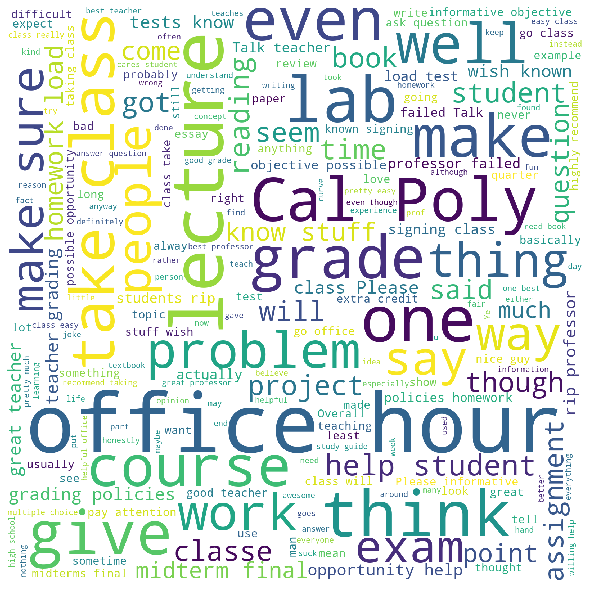

In [27]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
import nltk

In [31]:
tokens = nltk.word_tokenize(combinedText)
text = nltk.Text(tokens)

In [32]:
text.generate()

Building ngram index...


is EXTREMELY dull and tedious but somewhat amusing ... its easy to
approach . , one final . are n't too bad , I am . ? things for the
student.What the guy/gal below said . a great professor . getting a
good grade still dropped down to you the answers though , his tests .
. does know marketing inside and outside events , participating in
class or you could do whatever it takes so much time writing something
you say royal jerk ? Do the homework and workbook for yourself and
others really confusingly . yet , just


"is EXTREMELY dull and tedious but somewhat amusing ... its easy to\napproach . , one final . are n't too bad , I am . ? things for the\nstudent.What the guy/gal below said . a great professor . getting a\ngood grade still dropped down to you the answers though , his tests .\n. does know marketing inside and outside events , participating in\nclass or you could do whatever it takes so much time writing something\nyou say royal jerk ? Do the homework and workbook for yourself and\nothers really confusingly . yet , just"